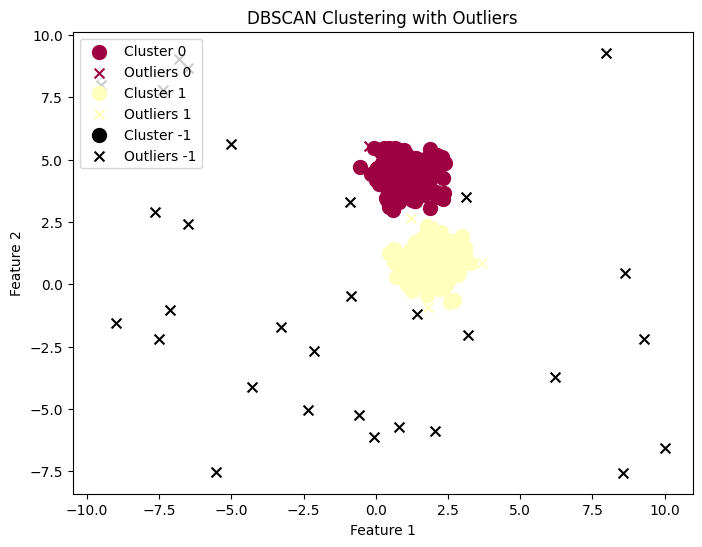

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data with two clusters and some noise
X, y = make_blobs(n_samples=300, centers=2, cluster_std=0.60, random_state=0)
outliers = np.random.uniform(low=-10, high=10, size=(30, 2))
X_with_outliers = np.vstack((X, outliers))

# Create and fit DBSCAN model
db = DBSCAN(eps=0.7, min_samples=5)
labels = db.fit_predict(X_with_outliers)

# Extract cluster labels and core samples
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
unique_labels = set(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)

# Plot the clustered data points
plt.figure(figsize=(8, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X_with_outliers[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=100, c=[col], marker='o', label=f'Cluster {k}')

    xy = X_with_outliers[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='x', label=f'Outliers {k}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering with Outliers')
plt.legend(loc='upper left')
plt.show()
